In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
haberman= pd.read_csv("C:/Data sets/haberman.csv")
haberman 

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [7]:
haberman.head(20)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [8]:
# it can be seen that this data consists of some patients their ages, the number of nodes they have along with what their current status is all about.

In [9]:
# Shape of the dataset 
print(haberman.shape)

(306, 4)


In [10]:
# Names of each columns 
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [11]:
# How many Data Points from each class are present ?
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [12]:
#  Therefore this data set is inbalanced.

# Objective :-

In [13]:
""" After looking at the data it could be said that our objective is to find how the age and # of nodes can determine 
   the severity/status of the cancer """

' After looking at the data it could be said that our objective is to find how the age and # of nodes can determine \n   the severity/status of the cancer '

# 2-D scatter plot 

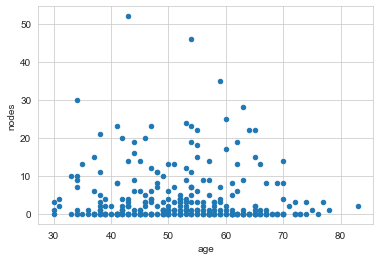

In [30]:
haberman.plot(kind='scatter',x="age",y="nodes"),
plt.show()

In [22]:
# Nothing specefic could be determined from 2-d scatter plot.

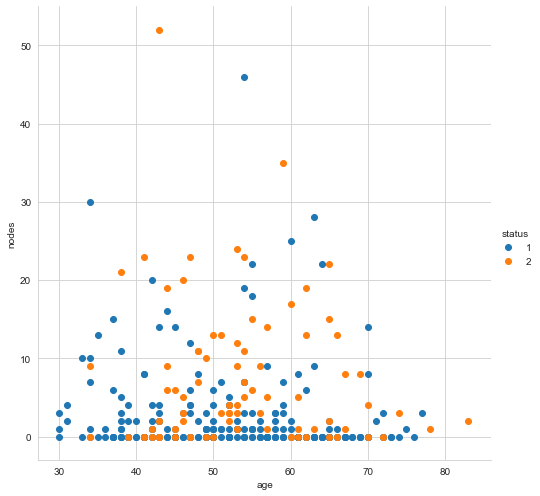

In [31]:
# Let's try to color the data points and see what could be obtained 

sns.set_style('whitegrid');
sns.FacetGrid(haberman,hue='status',size=7)\
   .map(plt.scatter,'age','nodes')\
   .add_legend();
plt.show()

In [ ]:
# even after drawing the scatter plot i'm unable to plot a linearly seperable line 2 seperate the 2 data points.
# let's try further by drawing pair plots for each variables.

# Pair - Plots 

In [32]:
# No. of Variables = 4
# No. of Pair plots = 4c2=6

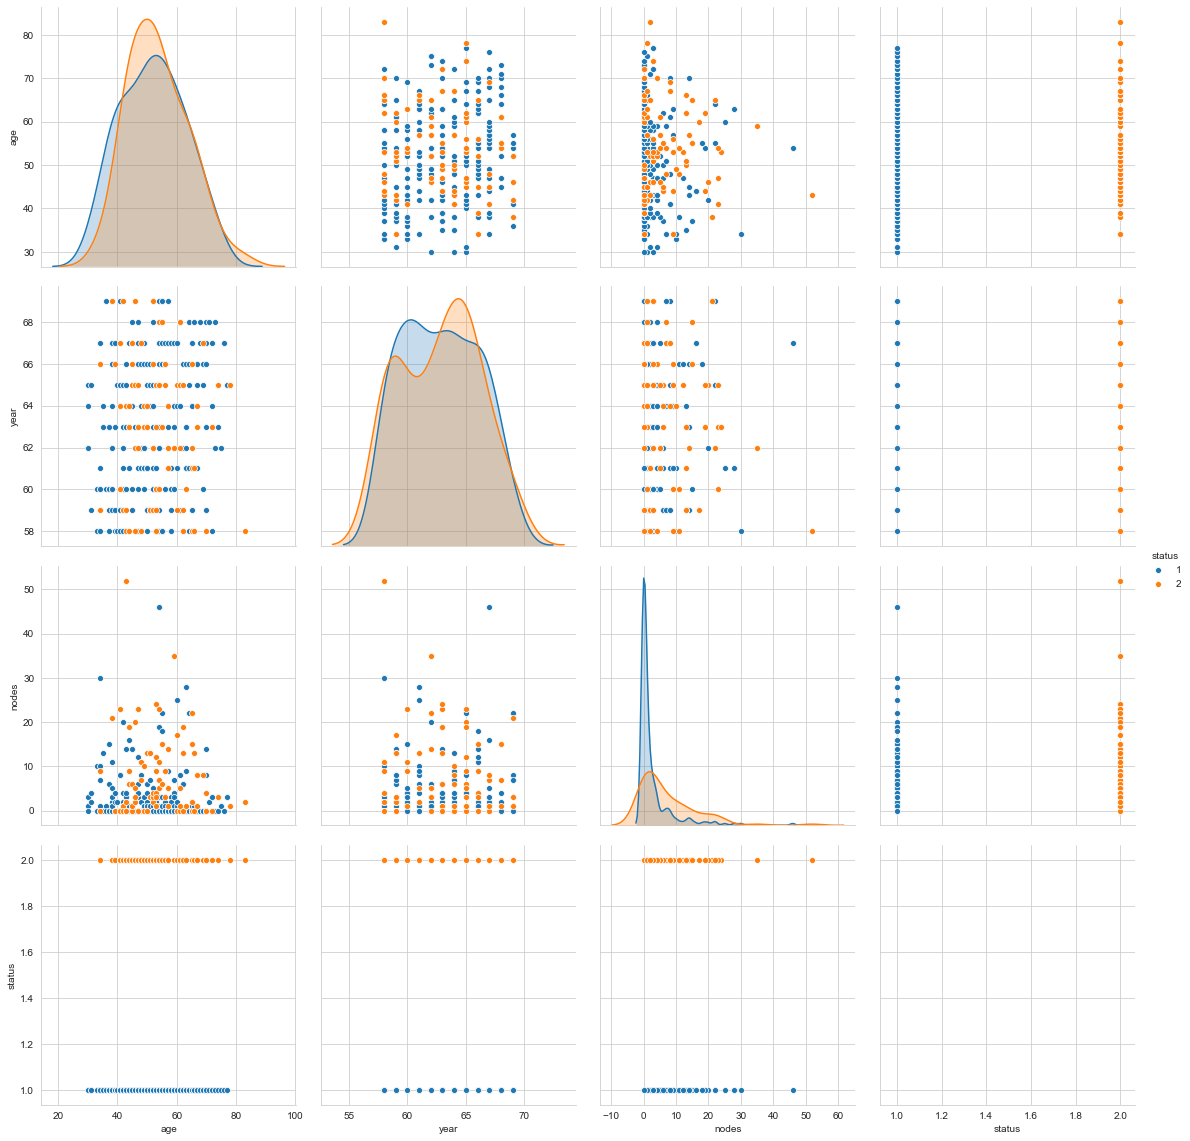

In [34]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman,hue='status',size=4);
plt.show()

In [35]:
# after drawing my pair plots i'm certain that my points for data analysis has to be age and nodes.
# 

In [36]:
## 1-D plots 

In [38]:
haberman_1=haberman.loc[haberman['status']==1];
haberman_2=haberman.loc[haberman['status']==2]

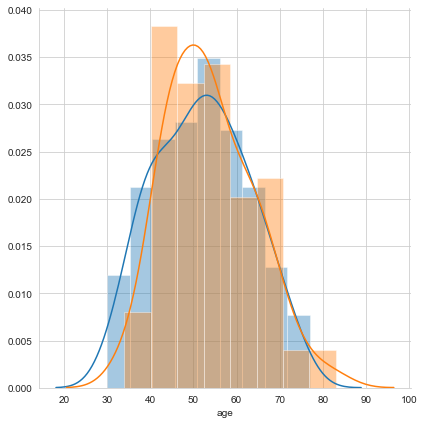

In [40]:
sns.FacetGrid(haberman,hue='status',size=6)\
   .map(sns.distplot,'age')
plt.show();

In [ ]:
## After looking at PDF for age it can be said that age group of 30-75 falls under category 1.
## the same age group people fall under category 2 as well.
## So, nothing could be determined from here.

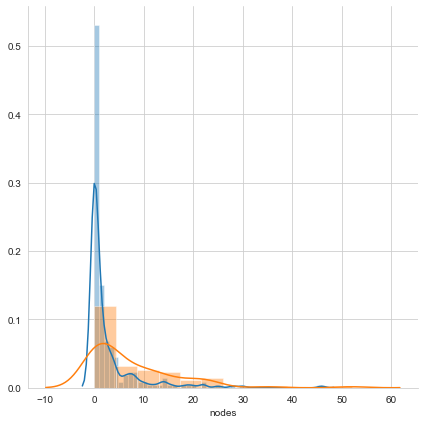

In [41]:
sns.FacetGrid(haberman,hue='status',size=6)\
   .map(sns.distplot,'nodes')
plt.show();

In [43]:
# Here after looking at Pdf for nodes it can be said that as the number of nodes increase the probability of a patient falling -
# under category 1 decreases and at same time probability for category 2 increases. 
## and it is also seen that the number of patients who have nodes from 0-4 fall under category 1 and are densely populated.

# CDF 


In [44]:
## Let's try drawing cummulative distribution function for number of nodes and see what else could be determined.

**** STATUS-1 CDF ****
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


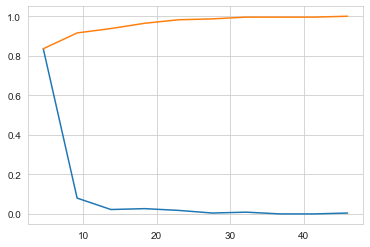

In [50]:
## CDF for Status 1
print("**** STATUS-1 CDF ****")

# PDF of nodes 
counts,bin_edges=np.histogram(haberman_1['nodes'],bins=10,density=True)

pdf= counts/(sum(counts))
print(pdf);
print(bin_edges)

# Computing CDF 
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

In [53]:
""" 90 percent of the patients from category 1 fall under no. of nodes <= 10.
    and further as the number of nodes increases from the pdf it can be seen that percentage of patients is decreasing 
    but cdf is approxiamately becoming constant.
    it can be said that with increase in number of nodes the proximity of a patient to fall under category 1 decreases."""

' 90 percent of the patients from category 1 fall under no. of nodes <= 10.\n    and further as the number of nodes increases from the pdf it can be seen that percentage of patients is decreasing \n    but cdf is approxiamately becoming constant.\n    it can be said that with increase in number of nodes the proximity of a patient to fall under category 1 decreases.'

**** STATUS-2 CDF ****
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


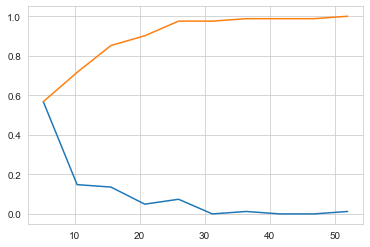

In [51]:
## CDF for Status 2
print("**** STATUS-2 CDF ****")

# PDF of nodes 
counts,bin_edges=np.histogram(haberman_2['nodes'],bins=10,density=True)

pdf= counts/(sum(counts))
print(pdf);
print(bin_edges)

# Computing CDF 
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

In [54]:
""" from pdf number of nodes between 10 to 30 percentage of patients falling in cat-2 has some constant values 
    and few downs but still from pdf it can be said that percentage of people in cat-2 is certainly more than the result we 
    obtained from cat-1. 
    from cdf it could be said thatmajority of patients who fall under cat-2 have around 10 to 20 as the number of nodes in their bodies.
    """

' from pdf number of nodes between 10 to 30 percentage of patients falling in cat-2 has some constant values \n    and few downs but still from pdf it can be said that percentage of people in cat-2 is certainly more than the result we \n    obtained from cat-1. \n    from cdf it could be said thatmajority of patients who fall under cat-2 have around 10 to 20 as the number of nodes in their bodies.\n    '

**** STATUS-1 CDF ****
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
**** STATUS-2 CDF ****
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


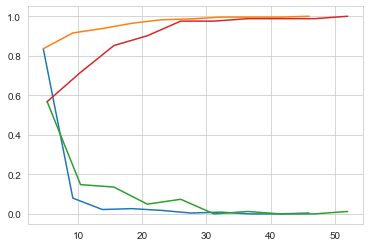

In [52]:
# CDF for both status together 

## CDF for Status 1
print("**** STATUS-1 CDF ****")

# PDF of nodes 
counts,bin_edges=np.histogram(haberman_1['nodes'],bins=10,density=True)

pdf= counts/(sum(counts))
print(pdf);
print(bin_edges)

# Computing CDF 
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

## CDF for Status 2
print("**** STATUS-2 CDF ****")

# PDF of nodes 
counts,bin_edges=np.histogram(haberman_2['nodes'],bins=10,density=True)

pdf= counts/(sum(counts))
print(pdf);
print(bin_edges)

# Computing CDF 
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();


In [55]:
## and from here it could be said that for patients with no. of nodes >= 25 likely to fall under cat-1.

# calculating , Mean , Median , std -dev , mad and percentile values for each categories.

In [56]:
print("********  MEAN *************")
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))

********  MEAN *************
2.7911111111111113
7.45679012345679


In [57]:
## from here it can be said for a patient to fall under cat-1 he has mean of 2.8 nodes
## and  for a patient to fall under cat-2 he has mean of 7.46 nodes

In [58]:
print("*****std-dev********")
print(np.std(haberman_1['nodes']))
print(np.std(haberman_2['nodes']))

*****std-dev********
5.857258449412131
9.128776076761632


In [60]:
# the distance/ gap b/w mean and the nodal points is quite much.

# therefore this data consists a number of outliers and operations via mean are not benifitable.
## let's go further and calculate median of the dataset.


In [61]:
print("****** MEDIAN *******")
print(np.median(haberman_1['nodes']))
print(np.median(haberman_2['nodes']))

****** MEDIAN *******
0.0
4.0


In [62]:
## through median it can be said that for falling under cat-1 0.0 nodes and 4.0 nodes for cat-2.

In [63]:
print("*******Percentiles and Quantiles ***********")
print(np.percentile(haberman_1['nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_2['nodes'],np.arange(0,100,25)))

*******Percentiles and Quantiles ***********
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


In [64]:
## for Cat-1 upto 75 percentile of people have nodes <= 3.
## for Cat-2 upto 50 percentile of people have nodes <= 4.

In [69]:
## calculationg 90, 95 and 99 percentile values 
# 90 
print("********* 90 *******")
print(np.percentile(haberman_1['nodes'],90))

print(np.percentile(haberman_2['nodes'],90))

#95
print("********* 95 *******")
print(np.percentile(haberman_1['nodes'],95))

print(np.percentile(haberman_2['nodes'],95))

#99
print("********* 99 *******")
print(np.percentile(haberman_1['nodes'],99))

print(np.percentile(haberman_2['nodes'],99))



"""
For cat-1 --> only 10 % of people have # of nodes > 8 and only 1% of people have # of nodes >27.

For cat-2 --> only 10 % of people have # of nodes > 20 and only 1% of people have # of nodes >38.

"""



********* 90 *******
8.0
20.0
********* 95 *******
14.0
23.0
********* 99 *******
27.279999999999973
38.40000000000005


'\nFor cat-1 --> only 10 % of people have # of nodes > 8 and only 1% of people have # of nodes >27.\n\nFor cat-2 --> only 10 % of people have # of nodes > 20 and only 1% of people have # of nodes >38.\n\n'

# Box plots and Whiskers 

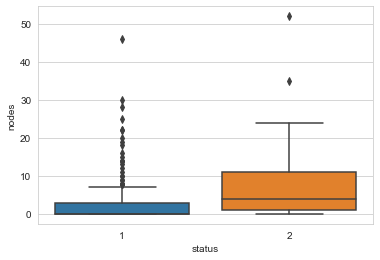

In [74]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()



In [75]:
## we can see a box width a height, breadth, Tshape structure and few points above T structure.
# Box - it represents the values of IQR from 25 percentile to 75 percentile (75%ile-25%ile) .
# width of the box help us to know the spread of the data at that point .
# T shape structure or WHISKERS = 1.5 * IQR. tells the range of number of nodes present in the data and above Whickers 
## --- those points are called outliers .

In [76]:
#Observation --->
# this data consists a lot outliers 
# on looking at box plots and outliers only we can say that more than  75% ile of data of cat-1 and less than 50 %ile of Data ---
# from cat-2 coincide and hardly seperable but after considering the whiskers of cat-1 and neglectiong the outliers we can ---
# conclude that for cat-2 we can create a model with an accracy of more than about 45%.


#  Violin Plots - A combination of histogram , pdf and boxplots 


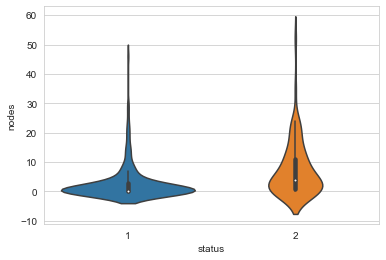

In [77]:
sns.violinplot(x='status',y='nodes',data=haberman,size=10)
plt.show()

In [81]:
# same as box plots but here the spread/ density of datapoints is shown by the pdf's at sides 

# Contour plots 


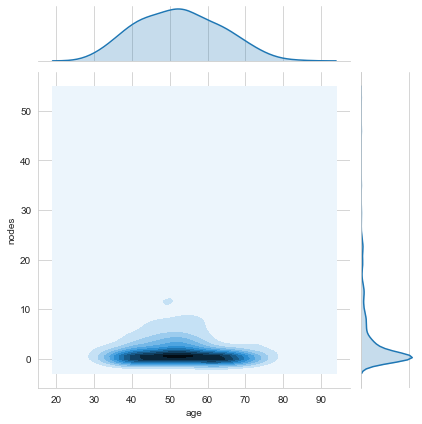

In [80]:
sns.jointplot(x='age',y='nodes',data=haberman,kind='kde')
plt.grid()
plt.show();

In [84]:
#sns.jointplot(x='nodes',y='age',data=haberman,kind='kde')
#plt.grid()
#plt.show();

In [85]:
""" Observation 
 1) after looking at the contour plots it can be said that  majority o fpeople suffering from breast cancer are between---
 2) the age group 40 to  65 as the areas are densely populated which can be seen from the contour plots.
 3) A majority number of people have nodes between 0 to 8 are likely to form under cat-1  as the data points in cat-1 >>>> cat-2.
     and we also saw 90%ile for cat-1.
 4) Nodes above 8 are likely to fall under cat-2.
 """

' Observation \n 1) after looking at the contour plots it can be said that  majority o fpeople suffering from breast cancer are between---\n 2) the age group 40 to  65 as the areas are densely populated which can be seen from the contour plots.\n 3) A majority number of people have nodes between 0 to 8 are likely to form under cat-1  as the data points in cat-1 >>>> cat-2.\n     and we also saw 90%ile for cat-1.\n 4) Nodes above 8 are likely to fall under cat-2.\n '

# Conclusion 

In [86]:
# Hence we can create a model to determine wether a person suffering from breast cancer on the basis of # of nodes will fall -
# under category/status.